In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/prem/Documents/Modelling in operational management/Stocktwits_Con_Cleaned.csv")

In [3]:
df.head()

,sentiment,message,userfollowers,user_likecount,message_likes,message_date
0,Bullish,"TD BUY $DBX at 19.13, Supp 18.78 Resis 20.35 R...",2512,1033,1.0,2020-09-30
1,Bullish,$DBX $CCL $GPRO $NAT I&#39;m not one to bash a...,100,1674,2.0,2020-09-29
2,Bullish,"Same deal with $SNAP, another Box-Trigger/pote...",32523,2825,2.0,2020-09-28
3,Bullish,Took some $SNAP $26.50c this week at .25,1163,6895,4.0,2020-09-28
4,Bullish,Impressive chart. Snapchat $SNAP No. 25 rank ...,57161,23,3.0,2020-09-28


In [4]:
df.shape

(4071, 6)

In [5]:
data = df['message']

In [6]:
data[4]

'Impressive chart. Snapchat $SNAP  No. 25 rank overall (out of 5,362).'

In [7]:
#emoji.demojize(data[4],use_aliases=True,delimiters=(' ',' '))

In [8]:
#for i in range(len(data)):
#    data[i]=emoji.demojize(data[i], delimiters=(' ','')) 

In [7]:
data[26]

'$MU keep selling into it'

In [8]:
import emoji
import re
import codecs
import unidecode
import spacy
nlp = spacy.load('en')

In [9]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [12]:
#pip install spacy
#pip install unidecode

In [13]:
# !python3 -m spacy download en

In [10]:
def replace_emoji(data):
    for i in range(len(data)):
        data[i]=emoji.demojize(data[i], delimiters=(' ',''))
    return data

In [11]:
data = replace_emoji(data)
data[4]

/home/prem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'Impressive chart. Snapchat $SNAP  No. 25 rank overall (out of 5,362).'

In [12]:
apostrophe_handled = []
for text in data: 
    apostrophe_handled.append(re.sub("’", "'", text))

In [13]:
expanded = []
for text in apostrophe_handled:
    expanded.append(' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")]))
    
#expanded

In [14]:
joined = []
for text in expanded:
    parsed = nlp(text)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined.append(' '.join(final_tokens))

In [15]:
#joined

In [16]:
spell_corrected = []
for text in joined:
    spell_corrected.append(re.sub(r'(.)\1+', r'\1\1', text).lower())

In [17]:
#spell_corrected

In [18]:
df['cleaned_message'] = spell_corrected

In [19]:
df.head(10)

,sentiment,message,userfollowers,user_likecount,message_likes,message_date,cleaned_message
0,Bullish,"TD BUY $DBX at 19.13, Supp 18.78 Resis 20.35 R...",2512,1033,1.0,2020-09-30,td buy dbx at supp resis hilo ty buy pe div dr...
1,Bullish,$DBX $CCL $GPRO $NAT I&#39;m not one to bash a...,100,1674,2.0,2020-09-29,dbx ccl gpro nat im not to bash anyone but peo...
2,Bullish,"Same deal with $SNAP, another Box-Trigger/pote...",32523,2825,2.0,2020-09-28,same deal with snap another box trigger potent...
3,Bullish,Took some $SNAP $26.50c this week at .25,1163,6895,4.0,2020-09-28,take some snap this week at
4,Bullish,Impressive chart. Snapchat $SNAP No. 25 rank ...,57161,23,3.0,2020-09-28,impressive chart snapchat snap no rank overall...
5,Bullish,"$CHGG Big candle, back to 80s soon",92,515,3.0,2020-09-28,chgg big candle back to soon
6,Bullish,$CHGG $75 this week,608,31368,6.0,2020-09-27,chgg this week
7,Bullish,$CHGG approaching strike,22056,5569,NaN,2020-09-25,chgg approach strike
8,Bullish,$CHGG needs a 70$ close or above to start the ...,150,8059,2.0,2020-09-25,chgg need close or above to start the next leg...
9,Bullish,$CHGG patience,150,8059,2.0,2020-09-25,chgg patience


In [20]:
df.drop(columns=['message','userfollowers','user_likecount','message_likes','message_date'],axis=1,inplace=True)
df.head()

,sentiment,cleaned_message
0,Bullish,td buy dbx at supp resis hilo ty buy pe div dr...
1,Bullish,dbx ccl gpro nat im not to bash anyone but peo...
2,Bullish,same deal with snap another box trigger potent...
3,Bullish,take some snap this week at
4,Bullish,impressive chart snapchat snap no rank overall...


In [21]:
df.shape

(4071, 2)

In [22]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.iloc[-1,:]

index                                                           4070
sentiment                                                    Bearish
cleaned_message    spy amzn amp fb at major resistance could not ...
Name: 3670, dtype: object

In [23]:
value = df['sentiment'].value_counts()
value

Bullish    2770
Bearish     901
Name: sentiment, dtype: int64

In [50]:
#import os
#os.chdir("/home/prem/Documents/Modelling in operational management")
#df.to_csv("Cleaned_Stocktwits_Dataset1.csv",index=False)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

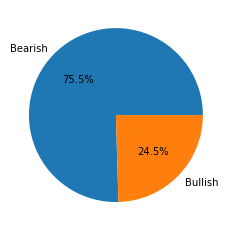

In [26]:
plt.pie(value,autopct='%1.1f%%',labels=['Bearish','Bullish'])
plt.show()

In [27]:
import numpy as np

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [29]:
tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
lr = LogisticRegression(solver='lbfgs')

from sklearn.model_selection import StratifiedKFold

def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    correctly_classified = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        conmat = np.array(confusion_matrix(Y[test], prediction))
        correctly_classified.append(conmat[0][0]+conmat[1][1])
        confusion = pd.DataFrame(conmat, index=['Bearish', 'Bullish'],
                         columns=['predicted_Bearish','predicted_Bullish'])
        print(confusion)
        print('\n')
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              Bearish    Bullish')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        
        #print("Classification Report\n")
        #print(classification_report(Y[test], prediction))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))
    return sum(correctly_classified)

In [30]:
from sklearn.pipeline import Pipeline

original_pipeline = Pipeline([('vectorizer', tvec),('classifier', lr)])
imbalance_correctly_classified = lr_cv(3, df.cleaned_message,df.sentiment, original_pipeline, 'macro')
imbalance_correctly_classified

         predicted_Bearish  predicted_Bullish
Bearish                  5                295
Bullish                  0                924


              Bearish    Bullish
precision: [1.         0.75799836]
recall:    [0.01666667 1.        ]
f1 score:  [0.03278689 0.86234251]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                  6                295
Bullish                  2                921


              Bearish    Bullish
precision: [0.75       0.75740132]
recall:    [0.01993355 0.99783315]
f1 score:  [0.03883495 0.86115007]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                  3                297
Bullish                  3                920


              Bearish    Bullish
precision: [0.5        0.75595727]
recall:    [0.01       0.99674973]
f1 score:  [0.01960784 0.85981308]
--------------------------------------------------
accuracy: 75.

2779

# Handle Imbalance Dataset

In [31]:
#pip install -U imbalanced-learn

In [32]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

#### Over-Sampling

In [33]:
ROS_pipeline = make_pipeline(tvec, RandomOverSampler(random_state=777),lr)

In [34]:
oversampling_correctly_classified = lr_cv(3, df.cleaned_message, df.sentiment, ROS_pipeline, 'macro')
oversampling_correctly_classified

         predicted_Bearish  predicted_Bullish
Bearish                145                155
Bullish                105                819


              Bearish    Bullish
precision: [0.58       0.84086242]
recall:    [0.48333333 0.88636364]
f1 score:  [0.52727273 0.8630137 ]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                152                149
Bullish                128                795


              Bearish    Bullish
precision: [0.54285714 0.84216102]
recall:    [0.50498339 0.86132178]
f1 score:  [0.5232358  0.85163364]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                164                136
Bullish                150                773


              Bearish    Bullish
precision: [0.52229299 0.85038504]
recall:    [0.54666667 0.83748646]
f1 score:  [0.53420195 0.84388646]
--------------------------------------------------
accuracy: 77.

2848

#### SMOTE - Synthetic Minority Over-Sampling Technique

In [35]:
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),lr)

In [36]:
smote_correctly_classified = lr_cv(3, df.cleaned_message, df.sentiment, SMOTE_pipeline, 'macro')
smote_correctly_classified

         predicted_Bearish  predicted_Bullish
Bearish                159                141
Bullish                146                778


              Bearish    Bullish
precision: [0.52131148 0.84657236]
recall:    [0.53       0.84199134]
f1 score:  [0.52561983 0.84427564]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                163                138
Bullish                159                764


              Bearish    Bullish
precision: [0.50621118 0.84700665]
recall:    [0.54152824 0.82773564]
f1 score:  [0.52327448 0.83726027]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                169                131
Bullish                195                728


              Bearish    Bullish
precision: [0.46428571 0.84749709]
recall:    [0.56333333 0.78873239]
f1 score:  [0.50903614 0.81705948]
--------------------------------------------------
accuracy: 75.

2761

#### Random UnderSampling

In [37]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
RUS_pipeline = make_pipeline(tvec, RandomUnderSampler(random_state=777),lr)
NM1_pipeline = make_pipeline(tvec, NearMiss(sampling_strategy='not minority', version = 1),lr)
NM2_pipeline = make_pipeline(tvec, NearMiss(sampling_strategy='not minority', version = 2),lr)
NM3_pipeline = make_pipeline(tvec, NearMiss(sampling_strategy='not minority',version = 3, n_neighbors_ver3=4),lr)

In [38]:
undersampling_correctly_classified = lr_cv(3, df.cleaned_message, df.sentiment, RUS_pipeline, 'macro')
undersampling_correctly_classified

         predicted_Bearish  predicted_Bullish
Bearish                233                 67
Bullish                328                596


              Bearish    Bullish
precision: [0.41532977 0.89894419]
recall:    [0.77666667 0.64502165]
f1 score:  [0.54123113 0.75110271]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                225                 76
Bullish                306                617


              Bearish    Bullish
precision: [0.42372881 0.89033189]
recall:    [0.74750831 0.66847237]
f1 score:  [0.54086538 0.76361386]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                245                 55
Bullish                354                569


              Bearish    Bullish
precision: [0.40901503 0.91185897]
recall:    [0.81666667 0.61646804]
f1 score:  [0.54505006 0.73561732]
--------------------------------------------------
accuracy: 67.

2485

#### Near-Miss 1

In [39]:
near_miss1 = lr_cv(3, df.cleaned_message, df.sentiment, NM1_pipeline, 'macro')
near_miss1

         predicted_Bearish  predicted_Bullish
Bearish                246                 54
Bullish                459                465


              Bearish    Bullish
precision: [0.34893617 0.89595376]
recall:    [0.82       0.50324675]
f1 score:  [0.48955224 0.64449064]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                230                 71
Bullish                443                480


              Bearish    Bullish
precision: [0.34175334 0.87114338]
recall:    [0.7641196  0.52004334]
f1 score:  [0.47227926 0.65128901]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                243                 57
Bullish                467                456


              Bearish    Bullish
precision: [0.34225352 0.88888889]
recall:    [0.81       0.49404117]
f1 score:  [0.48118812 0.63509749]
--------------------------------------------------
accuracy: 57.

2120

#### Near Miss 2

In [40]:
near_miss2 = lr_cv(3, df.cleaned_message, df.sentiment, NM2_pipeline, 'macro')
near_miss2

         predicted_Bearish  predicted_Bullish
Bearish                185                115
Bullish                321                603


              Bearish    Bullish
precision: [0.36561265 0.83983287]
recall:    [0.61666667 0.6525974 ]
f1 score:  [0.45905707 0.73447016]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                181                120
Bullish                312                611


              Bearish    Bullish
precision: [0.36713996 0.83584131]
recall:    [0.6013289  0.66197183]
f1 score:  [0.4559194  0.73881499]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                167                133
Bullish                344                579


              Bearish    Bullish
precision: [0.32681018 0.81320225]
recall:    [0.55666667 0.62730228]
f1 score:  [0.41183724 0.70825688]
--------------------------------------------------
accuracy: 63.

2326

#### Near Miss 3

In [41]:
near_miss3 = lr_cv(3, df.cleaned_message, df.sentiment, NM2_pipeline, 'macro')
near_miss3

         predicted_Bearish  predicted_Bullish
Bearish                185                115
Bullish                321                603


              Bearish    Bullish
precision: [0.36561265 0.83983287]
recall:    [0.61666667 0.6525974 ]
f1 score:  [0.45905707 0.73447016]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                181                120
Bullish                312                611


              Bearish    Bullish
precision: [0.36713996 0.83584131]
recall:    [0.6013289  0.66197183]
f1 score:  [0.4559194  0.73881499]
--------------------------------------------------
         predicted_Bearish  predicted_Bullish
Bearish                167                133
Bullish                344                579


              Bearish    Bullish
precision: [0.32681018 0.81320225]
recall:    [0.55666667 0.62730228]
f1 score:  [0.41183724 0.70825688]
--------------------------------------------------
accuracy: 63.

2326

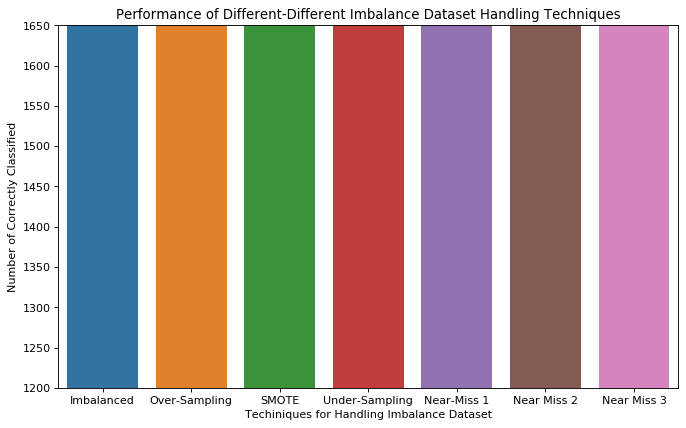

In [42]:
correctly_classified = [imbalance_correctly_classified,oversampling_correctly_classified,smote_correctly_classified,undersampling_correctly_classified,near_miss1,near_miss2,near_miss3]
labels = ['Imbalanced','Over-Sampling','SMOTE','Under-Sampling','Near-Miss 1','Near Miss 2','Near Miss 3']
#plt.bar(labels,correctly_classified,color = ['red','green','blue','yellow','black','orange','violet'])

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.ylim([1200,1650])
sns.barplot(x = labels,y= correctly_classified)

plt.title("Performance of Different-Different Imbalance Dataset Handling Techniques")
plt.xlabel("Techiniques for Handling Imbalance Dataset")
plt.ylabel("Number of Correctly Classified")
plt.show()

Here we conclude that Oversampling and Smote Technique is better than other sampling technique because it better in F1-score as well as it's Accuracy.

## Use ML Techniques

#### RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,criterion ='entropy')

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.cleaned_message,df.sentiment,test_size=0.25,random_state=32)

In [45]:
#from sklearn.feature_extraction import CountVectorizer
#countvector = CountVectorizer(ngram_range=(2,2))
#X_train = countvector.fit_transform(X_train)

In [46]:
#rf.fit(X_train,y_train)

In [47]:
#data1.to_csv('stocktwits_cleaned_messages.csv')

In [48]:
#dataset.to_csv('stocktwits_cleaned_messages_nlp.csv',index = False)